In [1]:
import numpy as np
from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-signals-{batchSize}.json'
path_to_mmpdf_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mmpdf-{batchSize}.json'
path_to_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\csc-mp-{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

In [3]:
with open(path_to_signals_db, 'r') as f:
            output_data = json.load(f)
            signals_results = output_data['signals']

id0 = next(x['id'] for x in signals_results if x['sparsity'] == 6 and x['snr'] == 10)

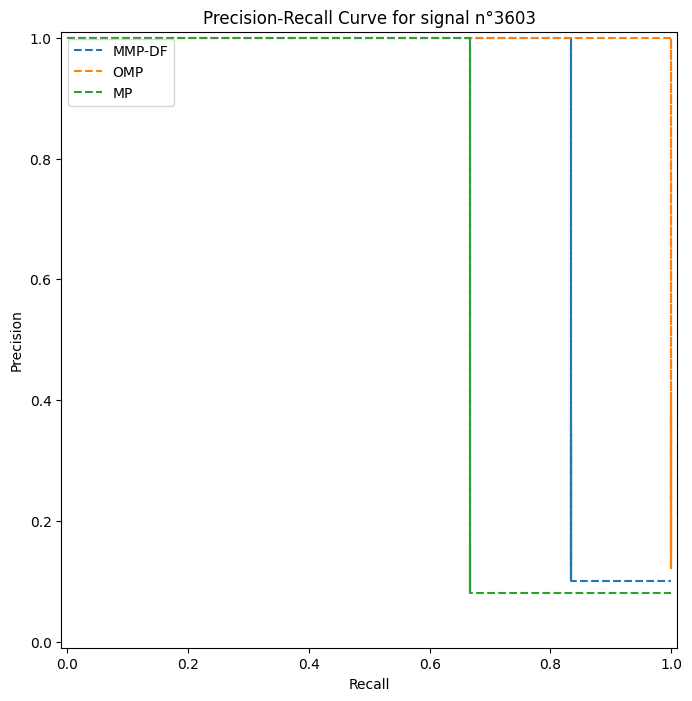

In [4]:
workbench.displayPRCurveComparisonFromId(path_to_mmpdf_db, path_to_mp_db, id0+3, max_branches=10, max_sparsity=50, verbose=False)

### Test OMP vs MMP-DF Candidate

Signal ID : 3604


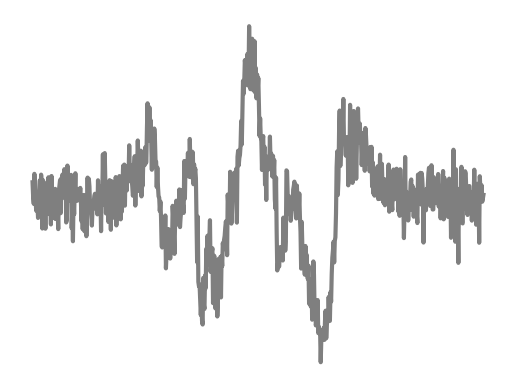

In [13]:
with open(path_to_mmpdf_db, 'r') as f:
    output_data = json.load(f)
    mmpdf_results = output_data['mmp']

signal_id = id0+4
print(f'Signal ID : {signal_id}')
mmp_tree_dict = next(mmpdf_dict['mmp-tree'] for mmpdf_dict in mmpdf_results if mmpdf_dict['id'] == signal_id)
signal_dict = next(x for x in signals_results if x['id'] == signal_id)
tree_sparsity, tree_connections = MMPTree.getTreeParamsFromMMPTreeDict(mmp_tree_dict=mmp_tree_dict)

plt.plot(signal_dict['signal'], color='k', lw=3, alpha=0.5)
plt.axis('off')
plt.show()

In [14]:
sparsity = 6
mmp_cand_atoms = MMPTree.mmpdfCandidateFromMMPTreeDict(mmp_tree_dict, signal_dict['signal'], candidate_sparsity=sparsity, verbose=True)
omp_cand_atoms = MMPTree.ompCandidateFromMMPTreeDict(mmp_tree_dict, signal_dict['signal'], candidate_sparsity=sparsity, verbose=True)

print(f'MMP-DF : {len(mmp_cand_atoms)} ; OMP : {len(omp_cand_atoms)}')

1-1-1-1-1-1 : 0.011768053972512103
2-1-2-1-1-1 : 0.014518836669273408
3-1-2-1-1-1 : 0.01771041739635127
1-2-1-1-1-1 : 0.017546992586857168
2-2-1-1-1-1 : 0.019760877148637092
3-2-1-1-1-1 : 0.01944613182157382
1-3-1-1-1-1 : 0.01835584478995551
2-3-1-1-1-1 : 0.02029261794396687
3-3-1-1-1-1 : 0.017529776621103554
1-1-2-1-1-1 : 0.013020235716165247
1-2-2-1-1-1 : 0.01756872231421099
2-2-2-1-1-1 : 0.01976087714863709
3-2-2-1-1-1 : 0.019205497091853378
1-3-2-1-1-1 : 0.015154498479101752
2-3-2-1-1-1 : 0.01423709723305782
3-3-2-1-1-1 : 0.021646608514136745
1-1-3-1-1-1 : 0.011920660263781078
2-1-3-1-1-1 : 0.01290256234543467
3-1-3-1-1-1 : 0.013656450278584255
1-2-3-1-1-1 : 0.017590052973247332
2-2-3-1-1-1 : 0.020541695721500195
3-2-3-1-1-1 : 0.015385172210639887
1-3-3-1-1-1 : 0.01124678837293548
2-3-3-1-1-1 : 0.011171753256900088
3-3-3-1-1-1 : 0.01646826539801378
MMP-DF : 2-3-3-1-1-1 | MSE = 0.011171753256900088
OMP : 1-1-1-1-1-1 MSE = 0.011768053972512103
MMP-DF : 6 ; OMP : 6


In [ ]:
mmp_signal = np.zeros_like(signal_dict['signal'])
for atom in mmp_cand_atoms :
    atom_signal = ZS


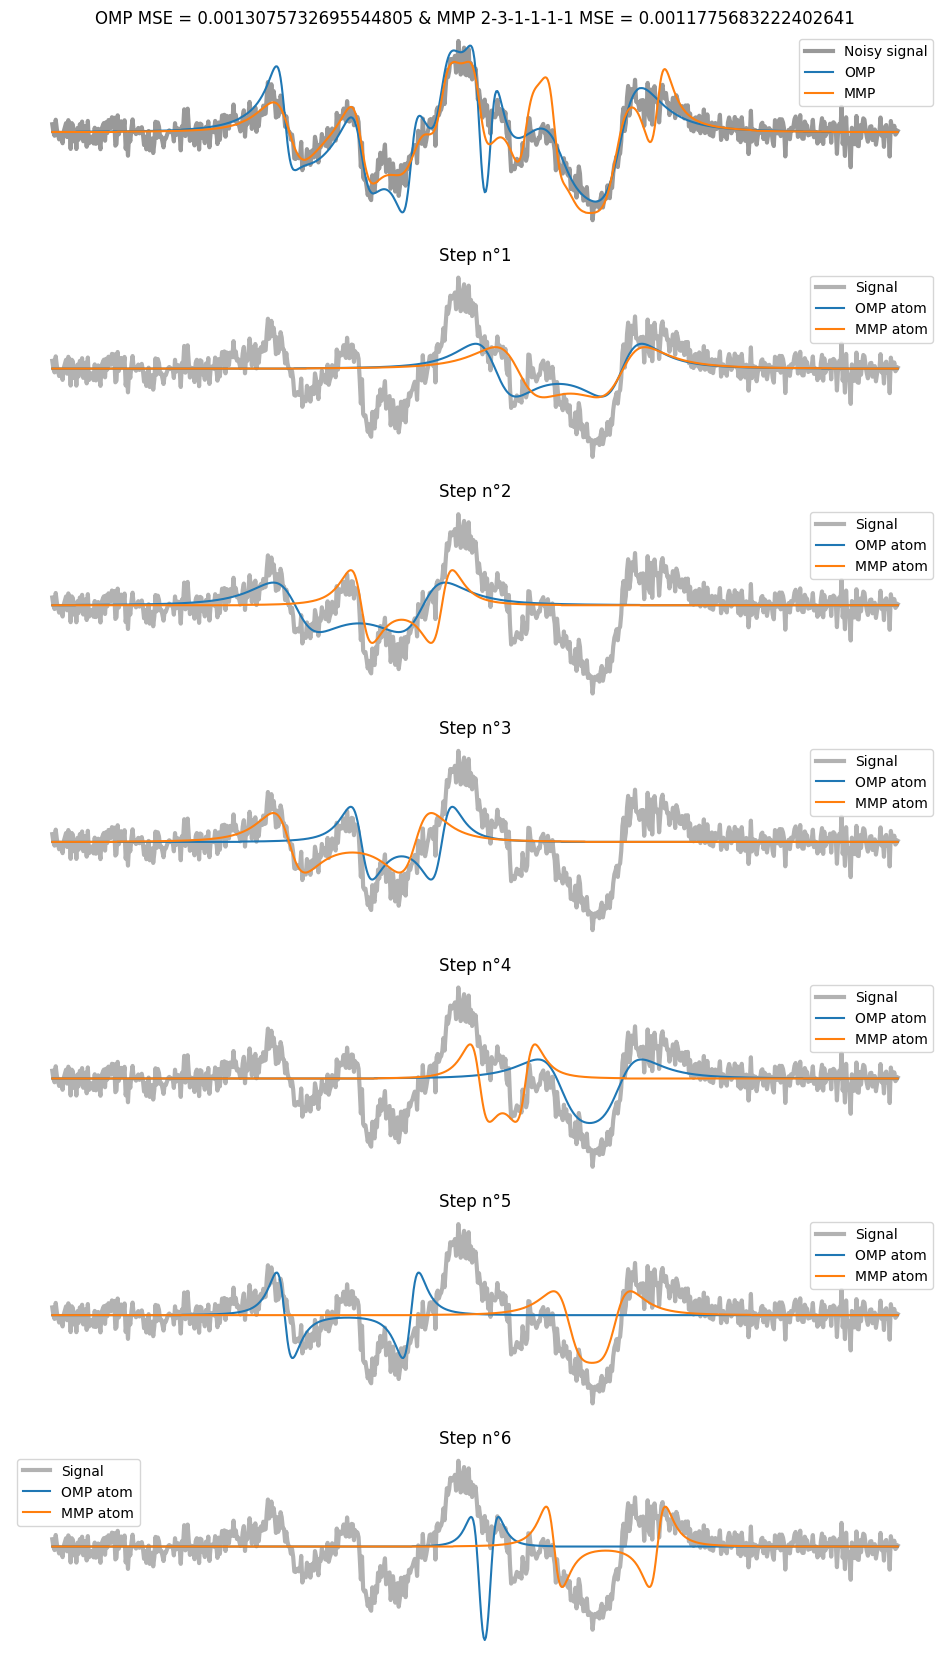

In [11]:
workbench.plotMMPDecomposition(path_to_mmpdf_db, id=signal_id)

In [12]:
position_error_threshold = 20

signal_atoms = signal_dict['atoms']
print(f'Signal ID : {signal_dict["id"]}')

print(f'\nMMP-DF candidates :')
for mmp_cand in mmp_cand_atoms :
    print(f'    {mmp_cand}')

print(f'\nOMP candidates :')
for omp_cand in omp_cand_atoms :
    print(f'    {omp_cand}')

print(f'\n\nTrue atoms :')
true_atoms = signal_dict['atoms']
nb_true_atoms = len(true_atoms)
for atom in true_atoms :
    print(atom)


# MMP-DF Matching
mmp_matched_atoms = workbench.computeMatchingPosition(true_atoms, mmp_cand_atoms)
print(f'\n\n========== MMP-DF Matching ==========')
for i, match in enumerate(mmp_matched_atoms) :
    print(f'\n  Match n°{i} : {abs(match[0]["x"] - match[1]["x"]) <= position_error_threshold}')
    print(f'    true : {match[0]}')
    print(f'    MMP-DF : {match[1]}')
mmp_position_errors = [abs(true_atom['x'] - mmp_cand_atom['x']) for true_atom, mmp_cand_atom in mmp_matched_atoms]
# MMP Metrics
mmp_tp = sum(1 for error in mmp_position_errors if error <= position_error_threshold)
mmp_precision = mmp_tp / sparsity
mmp_recall = mmp_tp / nb_true_atoms
print(f'\n ~~~~~~ MMP-DF : tp = {mmp_tp} ==> P = {mmp_precision}, R = {mmp_recall} ~~~~~~ ')


# OMP Matching
print(f'\n\n========== OMP Matching ==========')
omp_matched_atoms = workbench.computeMatchingPosition(true_atoms, omp_cand_atoms)
for i, match in enumerate(omp_matched_atoms) :
    print(f'\n  Match n°{i} : {abs(match[0]["x"] - match[1]["x"]) <= position_error_threshold}')
    print(f'    true : {match[0]}')
    print(f'    OMP : {match[1]}')
omp_position_errors = [abs(true_atom['x'] - omp_cand_atom['x']) for true_atom, omp_cand_atom in omp_matched_atoms]
# OMP Metrics
omp_tp = sum(1 for error in omp_position_errors if error <= position_error_threshold)
omp_precision = omp_tp / sparsity
omp_recall = omp_tp / nb_true_atoms
print(f'\n ~~~~~~ OMP : tp = {omp_tp} ==> P = {omp_precision}, R = {omp_recall} ~~~~~~ ')

omp_branch_name = "-".join(["1" for _ in range(tree_sparsity)])
print(f'\n\nComparison with MMPTree dict {omp_branch_name}')
omp_branch_atoms = mmp_tree_dict[omp_branch_name]['atoms']
for atom in omp_branch_atoms :
    print(atom)


Signal ID : 3604

MMP-DF candidates :
    {'x': 205, 'b': 0.045, 'y': 0.034, 's': 7.209068871352413e-05}
    {'x': 58, 'b': 0.034999999999999996, 'y': 0.016, 's': 2.4700769240040715e-05}
    {'x': 12, 'b': 0.055, 'y': 0.012, 's': 1.653959710339202e-05}
    {'x': 146, 'b': 0.02, 'y': 0.014, 's': 1.9224997624588253e-05}
    {'x': 25, 'b': 0.055, 'y': 0.034, 's': 7.393805589498585e-05}
    {'x': 224, 'b': 0.02, 'y': 0.022, 's': 3.693602068568517e-05}

OMP candidates :
    {'x': 195, 'b': 0.055, 'y': 0.03, 's': 6.2248555025221e-05}
    {'x': 21, 'b': 0.055, 'y': 0.034, 's': 7.393805589498585e-05}
    {'x': 58, 'b': 0.034999999999999996, 'y': 0.016, 's': 2.4700769240040715e-05}
    {'x': 222, 'b': 0.025, 'y': 0.032, 's': 6.596752580999086e-05}
    {'x': 11, 'b': 0.055, 'y': 0.012, 's': 1.653959710339202e-05}
    {'x': 131, 'b': 0.005, 'y': 0.01, 's': 1.3516616682807639e-05}


True atoms :
{'x': 230, 'b': 0.04, 'y': 0.03, 's': 5.980153670398561e-05}
{'x': 32, 'b': 0.005, 'y': 0.02, 's': 6.28